# standardization 

- Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.


- no effect on outliers
- use standardization in below case

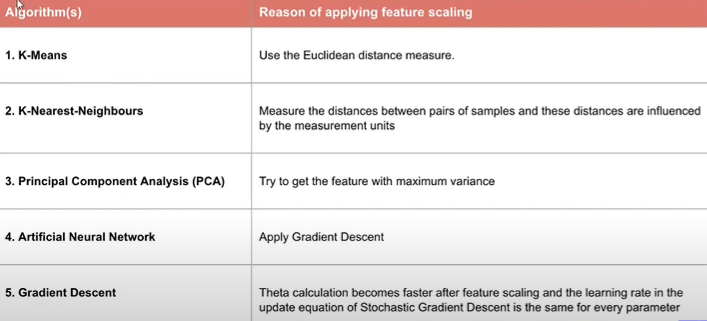

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df = df.iloc[:,2:] # right now we are just standardizing data 
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Test train split

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split( df.drop('Purchased',axis = 1),
                                                 df['Purchased'],
                                                 test_size = 0.25,
                                                 random_state = 0)
X_train.shape, X_test.shape

((300, 2), (100, 2))

## StandardScaler

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters 
scaler.fit(X_train)

# Transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
scaler.mean_

array([3.81266667e+01, 6.95833333e+04])

In [7]:
# X_train_scaler is numpy array so just for better visual we tranform it to data frame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [8]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,38.1,69583.3
std,10.1,34548.5
min,18.0,15000.0
25%,30.8,43000.0
50%,38.0,69500.0
75%,46.0,88000.0
max,60.0,150000.0


In [9]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-1.6
25%,-0.7,-0.8
50%,-0.0,-0.0
75%,0.8,0.5
max,2.2,2.3


## Effect of Scaling

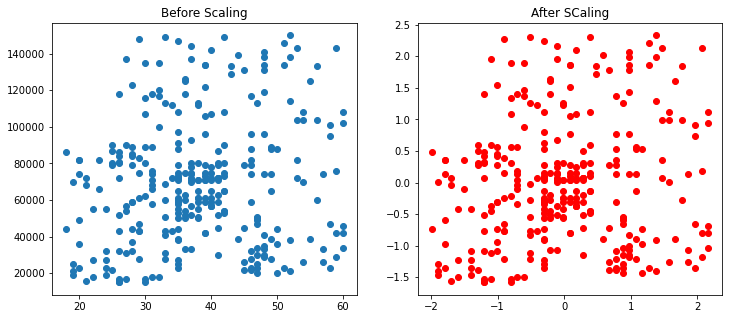

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color = 'red')
ax2.set_title("After SCaling")
plt.show()

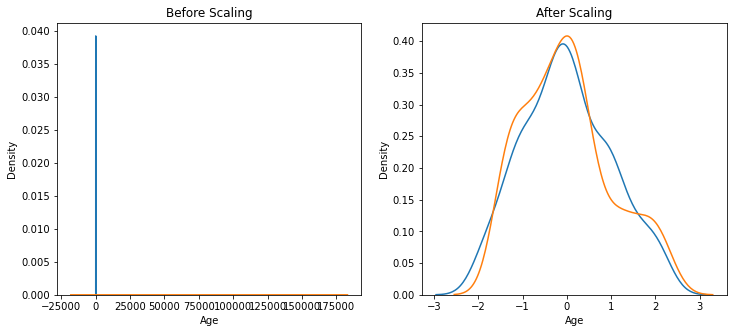

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax = ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax =ax1)

# After scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax = ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax =ax2)
plt.show()


# blue line is age and orange is salary

## Comparison of Distribution

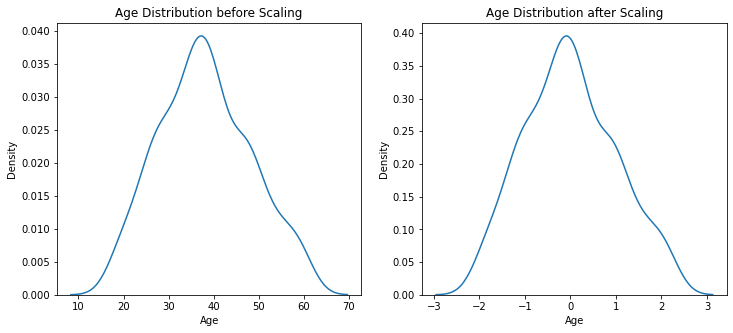

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,5))

# before scaling
ax1.set_title('Age Distribution before Scaling')
sns.kdeplot(X_train['Age'], ax = ax1)

# After scaling
ax2.set_title('Age Distribution after Scaling')
sns.kdeplot(X_train_scaled['Age'], ax = ax2)
plt.show()

## Why Scaling is Important ? 

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [15]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [16]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
print('When we use LogisticRegression with and without scaling')
print('Actual', accuracy_score(y_test, y_pred))
print('Scaled', accuracy_score(y_test, y_pred_scaled))

When we use LogisticRegression with and without scaling
Actual 0.68
Scaled 0.89


In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [21]:
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [22]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [24]:
print('When we use DecisionTreeClassifier with and without scaling')
print('Actual', accuracy_score(y_test, y_pred))
print('Scaled', accuracy_score(y_test, y_pred_scaled))

When we use DecisionTreeClassifier with and without scaling
Actual 0.91
Scaled 0.9


- DecisionTreeClassifier has no effect of scaling but LogisticRegression has

In [25]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000
